In [1]:
from pyforest import *

In [2]:
gestures=pd.read_csv("C:/Users/Eagle3y3/Desktop/datascience program py/capstone project/Project - 2/Postures.csv")

In [3]:
gestures.head(5)

Class  User         X0         Y0         Z0         X1         Y1  \
0      0     0   0.000000   0.000000   0.000000   0.000000   0.000000   
1      1     0  54.263880  71.466776 -64.807709  76.895635  42.462500   
2      1     0  56.527558  72.266609 -61.935252  39.135978  82.538530   
3      1     0  55.849928  72.469064 -62.562788  37.988804  82.631347   
4      1     0  55.329647  71.707275 -63.688956  36.561863  81.868749   

          Z1         X2         Y2  ...  Z8 X9 Y9 Z9 X10 Y10 Z10 X11 Y11 Z11  
0   0.000000   0.000000   0.000000  ...   0  0  0  0   0   0   0   0   0   0  
1 -72.780545  36.621229  81.680557  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
2 -49.596509  79.223743  43.254091  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
3 -50.606259  78.451526  43.567403  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
4 -52.752784  86.320630  68.214645  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  

[5 rows x 38 columns]

In [4]:
!pip install keras


In [5]:
!pip install tensorflow

In [6]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Dropout

# fix random seed for reproducibility
seed = 1
np.random.seed(seed)

# load dataset
dataframe = pd.read_csv("C:/Users/Eagle3y3/Desktop/datascience program py/capstone project/Project - 2/Postures.csv")

for val in list(dataframe.columns.values):
    dataframe[val] = pd.to_numeric(dataframe[val], errors='coerce')

#fill missing data
dataframe=dataframe.fillna(dataframe.mean())

#keep only first class
dataframe=dataframe.loc[dataframe['Class'] == 1]

dataframe=dataframe.drop(['Class'], axis=1)


#normalize data
listValuesToNormalize=list(dataframe.columns.values)
listValuesToNormalize.remove('User')
listValuesToNormalize
dataframe[listValuesToNormalize] = minmax_scale(dataframe[listValuesToNormalize])

# get dataset (split it in input/output)
dataset = dataframe.values

X = dataset[:,1:].astype(float)
Y = dataset[:,0].astype(int)

# convert integers to  one hot encoded
hot_encoded_y = np_utils.to_categorical(Y)

#split 0.8/0.2
X_train, X_test, y_train, y_test = train_test_split(X, hot_encoded_y, test_size=0.2, random_state=seed)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=seed)

print("the dataset has "+str(X.shape[0])+ "samples that are splitted in:")
print("- "+str(X_train.shape[0])+"samples (training set)" )
print("- "+str(X_val.shape[0])+"samples (validation set)")
print("- "+str(X_test.shape[0])+"samples (test set)")

# create model
model = Sequential()
model.add(Dense(12, input_dim=36, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(15, activation='softmax'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=140, batch_size=20)

#test model
loss, acc =  model.evaluate(X_test, y_test, verbose=0)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

#test model
loss, acc =  model.evaluate(X_test, y_test, verbose=0)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))
model.save('my_model_class0_predictUser.h5')


Using TensorFlow backend.


the dataset has 16265samples that are splitted in:
- 9759samples (training set)
- 3253samples (validation set)
- 3253samples (test set)
Train on 9759 samples, validate on 3253 samples
Epoch 1/140
9759/9759 [==============================] - 3s 331us/step - loss: 0.2328 - accuracy: 0.9333 - val_loss: 0.2232 - val_accuracy: 0.9333
Epoch 2/140
9759/9759 [==============================] - 1s 92us/step - loss: 0.2175 - accuracy: 0.9335 - val_loss: 0.1997 - val_accuracy: 0.9330
Epoch 3/140
9759/9759 [==============================] - 1s 90us/step - loss: 0.1979 - accuracy: 0.9339 - val_loss: 0.1799 - val_accuracy: 0.9332
Epoch 4/140
9759/9759 [==============================] - 1s 93us/step - loss: 0.1855 - accuracy: 0.9345 - val_loss: 0.1652 - val_accuracy: 0.9356
Epoch 5/140
9759/9759 [==============================] - 1s 86us/step - loss: 0.1757 - accuracy: 0.9353 - val_loss: 0.1544 - val_accuracy: 0.9370
Epoch 6/140
9759/9759 [==============================] - 1s 88us/step - loss: 0.1682 

9759/9759 [==============================] - 1s 86us/step - loss: 0.1073 - accuracy: 0.9576 - val_loss: 0.0571 - val_accuracy: 0.9813
Epoch 55/140
9759/9759 [==============================] - 1s 85us/step - loss: 0.1054 - accuracy: 0.9580 - val_loss: 0.0563 - val_accuracy: 0.9823
Epoch 56/140
9759/9759 [==============================] - 1s 86us/step - loss: 0.1058 - accuracy: 0.9579 - val_loss: 0.0598 - val_accuracy: 0.9768
Epoch 57/140
9759/9759 [==============================] - 1s 86us/step - loss: 0.1051 - accuracy: 0.9584 - val_loss: 0.0605 - val_accuracy: 0.9802
Epoch 58/140
9759/9759 [==============================] - 1s 86us/step - loss: 0.1046 - accuracy: 0.9589 - val_loss: 0.0545 - val_accuracy: 0.9828
Epoch 59/140
9759/9759 [==============================] - 1s 86us/step - loss: 0.1039 - accuracy: 0.9591 - val_loss: 0.0554 - val_accuracy: 0.9813
Epoch 60/140
9759/9759 [==============================] - 1s 91us/step - loss: 0.1029 - accuracy: 0.9596 - val_loss: 0.0541 - val_a

9759/9759 [==============================] - 1s 144us/step - loss: 0.0914 - accuracy: 0.9651 - val_loss: 0.0397 - val_accuracy: 0.9918
Epoch 110/140
9759/9759 [==============================] - 2s 168us/step - loss: 0.0927 - accuracy: 0.9650 - val_loss: 0.0406 - val_accuracy: 0.9910
Epoch 111/140
9759/9759 [==============================] - 2s 187us/step - loss: 0.0901 - accuracy: 0.9660 - val_loss: 0.0419 - val_accuracy: 0.9906
Epoch 112/140
9759/9759 [==============================] - 2s 166us/step - loss: 0.0897 - accuracy: 0.9660 - val_loss: 0.0438 - val_accuracy: 0.9871
Epoch 113/140
9759/9759 [==============================] - 2s 183us/step - loss: 0.0908 - accuracy: 0.9657 - val_loss: 0.0451 - val_accuracy: 0.9889
Epoch 114/140
9759/9759 [==============================] - 2s 174us/step - loss: 0.0906 - accuracy: 0.9652 - val_loss: 0.0433 - val_accuracy: 0.9901
Epoch 115/140
9759/9759 [==============================] - 2s 168us/step - loss: 0.0894 - accuracy: 0.9659 - val_loss: 0

In [7]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load dataset
dataframe = pd.read_csv("C:/Users/Eagle3y3/Desktop/datascience program py/capstone project/Project - 2/Postures.csv")


for val in list(dataframe.columns.values):
    dataframe[val] = pd.to_numeric(dataframe[val], errors='coerce')

    
dataframe=dataframe.fillna(dataframe.mean())


listValuesToNormalize=list(dataframe.columns.values)
listValuesToNormalize.remove('Class')
listValuesToNormalize.remove('User')
listValuesToNormalize
dataframe[listValuesToNormalize] = minmax_scale(dataframe[listValuesToNormalize])

# get dataset (split it in input/output)
dataset = dataframe.values

X = dataset[:,2:].astype(float)
Y = dataset[:,0].astype(int)

# convert integers to  one hot encoded
hot_encoded_y = np_utils.to_categorical(Y)

#split 0.8/0.2
X_train, X_test, y_train, y_test = train_test_split(X, hot_encoded_y, test_size=0.2, random_state=1)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print("the dataset has "+str(X.shape[0])+ "samples that are splitted in:")
print("- "+str(X_train.shape[0])+"samples (training set)" )
print("- "+str(X_val.shape[0])+"samples (validation set)")
print("- "+str(X_test.shape[0])+"samples (test set)")

# create model
model = Sequential()
model.add(Dense(12, input_dim=36, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='relu'))
#model.add(Dropout(0.7371698374615214))
model.add(Dense(6, activation='softmax'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=160, batch_size=40)

#test model
loss, acc =  model.evaluate(X_test, y_test, verbose=0)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))
model.save('my_model_only_class_v2.h5')

the dataset has 78096samples that are splitted in:
- 46857samples (training set)
- 15619samples (validation set)
- 15620samples (test set)
Train on 46857 samples, validate on 15619 samples
Epoch 1/160
46857/46857 [==============================] - 4s 93us/step - loss: 0.3573 - accuracy: 0.8485 - val_loss: 0.3091 - val_accuracy: 0.8693
Epoch 2/160
46857/46857 [==============================] - 4s 91us/step - loss: 0.2871 - accuracy: 0.8783 - val_loss: 0.2716 - val_accuracy: 0.8868
Epoch 3/160
46857/46857 [==============================] - 4s 86us/step - loss: 0.2535 - accuracy: 0.8937 - val_loss: 0.2362 - val_accuracy: 0.9010
Epoch 4/160
46857/46857 [==============================] - 4s 88us/step - loss: 0.2304 - accuracy: 0.9045 - val_loss: 0.2145 - val_accuracy: 0.9140
Epoch 5/160
46857/46857 [==============================] - 4s 80us/step - loss: 0.2123 - accuracy: 0.9141 - val_loss: 0.2038 - val_accuracy: 0.9178
Epoch 6/160
46857/46857 [==============================] - 4s 87us/step

Epoch 55/160
46857/46857 [==============================] - 4s 93us/step - loss: 0.1063 - accuracy: 0.9631 - val_loss: 0.1064 - val_accuracy: 0.9621
Epoch 56/160
46857/46857 [==============================] - 4s 96us/step - loss: 0.1059 - accuracy: 0.9634 - val_loss: 0.1038 - val_accuracy: 0.9636
Epoch 57/160
46857/46857 [==============================] - 4s 93us/step - loss: 0.1056 - accuracy: 0.9634 - val_loss: 0.1097 - val_accuracy: 0.9590
Epoch 58/160
46857/46857 [==============================] - 4s 94us/step - loss: 0.1057 - accuracy: 0.9637 - val_loss: 0.0983 - val_accuracy: 0.9661
Epoch 59/160
46857/46857 [==============================] - 4s 96us/step - loss: 0.1045 - accuracy: 0.9637 - val_loss: 0.1019 - val_accuracy: 0.9640
Epoch 60/160
46857/46857 [==============================] - 5s 97us/step - loss: 0.1039 - accuracy: 0.9637 - val_loss: 0.1021 - val_accuracy: 0.9630
Epoch 61/160
46857/46857 [==============================] - 5s 99us/step - loss: 0.1040 - accuracy: 0.9638

Epoch 110/160
46857/46857 [==============================] - 4s 90us/step - loss: 0.0874 - accuracy: 0.9699 - val_loss: 0.0835 - val_accuracy: 0.9711
Epoch 111/160
46857/46857 [==============================] - 4s 91us/step - loss: 0.0873 - accuracy: 0.9697 - val_loss: 0.0843 - val_accuracy: 0.9714
Epoch 112/160
46857/46857 [==============================] - 4s 89us/step - loss: 0.0869 - accuracy: 0.9702 - val_loss: 0.0853 - val_accuracy: 0.9705
Epoch 113/160
46857/46857 [==============================] - 4s 91us/step - loss: 0.0872 - accuracy: 0.9700 - val_loss: 0.0800 - val_accuracy: 0.9729
Epoch 114/160
46857/46857 [==============================] - 4s 88us/step - loss: 0.0857 - accuracy: 0.9705 - val_loss: 0.0843 - val_accuracy: 0.9703
Epoch 115/160
46857/46857 [==============================] - 4s 91us/step - loss: 0.0852 - accuracy: 0.9706 - val_loss: 0.0889 - val_accuracy: 0.9670
Epoch 116/160
46857/46857 [==============================] - 4s 89us/step - loss: 0.0859 - accuracy:

In [8]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

# fix random seed for reproducibility
seed = 1
np.random.seed(seed)

# load dataset
dataframe = pd.read_csv("C:/Users/Eagle3y3/Desktop/datascience program py/capstone project/Project - 2/Postures.csv")


dataframe = pd.read_csv("C:/Users/Eagle3y3/Desktop/datascience program py/capstone project/Project - 2/Postures.csv")
for val in list(dataframe.columns.values):
    dataframe[val] = pd.to_numeric(dataframe[val], errors='coerce')
    
dataframe=dataframe.fillna(dataframe.mean())

hot_encoded_user = np_utils.to_categorical(dataframe['User'], dtype='int32')
frame_user=pd.DataFrame(hot_encoded_user)
dataframe = pd.concat([dataframe, frame_user], axis=1)

listValuesToNormalize=list(dataframe.columns.values)
listValuesToNormalize.remove('Class')
listValuesToNormalize.remove('User')
listValuesToNormalize
dataframe[listValuesToNormalize] = minmax_scale(dataframe[listValuesToNormalize])

# get dataset (split it in input/output)
dataset = dataframe.values

X = dataset[:,2:].astype(float)
Y = dataset[:,0].astype(int)

# convert integers to  one hot encoded
hot_encoded_y = np_utils.to_categorical(Y)

#split 0.8/0.2
X_train, X_test, y_train, y_test = train_test_split(X, hot_encoded_y, test_size=0.2, random_state=seed)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=seed)

print("the dataset has "+str(X.shape[0])+ "samples that are splitted in:")
print("- "+str(X_train.shape[0])+"samples (training set)" )
print("- "+str(X_val.shape[0])+"samples (validation set)")
print("- "+str(X_test.shape[0])+"samples (test set)")

# create model
model = Sequential()
model.add(Dense(12, input_dim=51, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.7371698374615214))
model.add(Dense(6, activation='softmax'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=180, batch_size=40)

#test model
loss, acc =  model.evaluate(X_test, y_test, verbose=0)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))
model.save('my_model_use_userID.h5')

the dataset has 78096samples that are splitted in:
- 46857samples (training set)
- 15619samples (validation set)
- 15620samples (test set)
Train on 46857 samples, validate on 15619 samples
Epoch 1/180
46857/46857 [==============================] - 3s 55us/step - loss: 0.3643 - accuracy: 0.8431 - val_loss: 0.2813 - val_accuracy: 0.8748
Epoch 2/180
46857/46857 [==============================] - 2s 47us/step - loss: 0.2540 - accuracy: 0.8959 - val_loss: 0.2273 - val_accuracy: 0.9110
Epoch 3/180
46857/46857 [==============================] - 2s 50us/step - loss: 0.2196 - accuracy: 0.9133 - val_loss: 0.2015 - val_accuracy: 0.9233
Epoch 4/180
46857/46857 [==============================] - 2s 50us/step - loss: 0.1946 - accuracy: 0.9249 - val_loss: 0.1820 - val_accuracy: 0.9328
Epoch 5/180
46857/46857 [==============================] - 2s 49us/step - loss: 0.1756 - accuracy: 0.9333 - val_loss: 0.1634 - val_accuracy: 0.9392
Epoch 6/180
46857/46857 [==============================] - 2s 48us/step

Epoch 55/180
46857/46857 [==============================] - 2s 43us/step - loss: 0.0288 - accuracy: 0.9918 - val_loss: 0.0295 - val_accuracy: 0.9916
Epoch 56/180
46857/46857 [==============================] - 2s 43us/step - loss: 0.0296 - accuracy: 0.9914 - val_loss: 0.0300 - val_accuracy: 0.9898
Epoch 57/180
46857/46857 [==============================] - 2s 43us/step - loss: 0.0280 - accuracy: 0.9920 - val_loss: 0.0328 - val_accuracy: 0.9891
Epoch 58/180
46857/46857 [==============================] - 2s 43us/step - loss: 0.0284 - accuracy: 0.9917 - val_loss: 0.0305 - val_accuracy: 0.9906
Epoch 59/180
46857/46857 [==============================] - 2s 43us/step - loss: 0.0285 - accuracy: 0.9918 - val_loss: 0.0244 - val_accuracy: 0.9934
Epoch 60/180
46857/46857 [==============================] - 2s 43us/step - loss: 0.0281 - accuracy: 0.9922 - val_loss: 0.0308 - val_accuracy: 0.9906
Epoch 61/180
46857/46857 [==============================] - 2s 44us/step - loss: 0.0282 - accuracy: 0.9918

Epoch 110/180
46857/46857 [==============================] - 2s 43us/step - loss: 0.0221 - accuracy: 0.9939 - val_loss: 0.0246 - val_accuracy: 0.9926
Epoch 111/180
46857/46857 [==============================] - 2s 43us/step - loss: 0.0223 - accuracy: 0.9941 - val_loss: 0.0215 - val_accuracy: 0.9937
Epoch 112/180
46857/46857 [==============================] - 2s 44us/step - loss: 0.0228 - accuracy: 0.9938 - val_loss: 0.0195 - val_accuracy: 0.9943
Epoch 113/180
46857/46857 [==============================] - 2s 43us/step - loss: 0.0218 - accuracy: 0.9942 - val_loss: 0.0190 - val_accuracy: 0.9943
Epoch 114/180
46857/46857 [==============================] - 2s 43us/step - loss: 0.0220 - accuracy: 0.9940 - val_loss: 0.0194 - val_accuracy: 0.9946
Epoch 115/180
46857/46857 [==============================] - 2s 43us/step - loss: 0.0216 - accuracy: 0.9942 - val_loss: 0.0213 - val_accuracy: 0.9938
Epoch 116/180
46857/46857 [==============================] - 2s 43us/step - loss: 0.0218 - accuracy:

46857/46857 [==============================] - 2s 50us/step - loss: 0.0177 - accuracy: 0.9948 - val_loss: 0.0165 - val_accuracy: 0.9950
Epoch 165/180
46857/46857 [==============================] - 2s 43us/step - loss: 0.0177 - accuracy: 0.9947 - val_loss: 0.0175 - val_accuracy: 0.9944
Epoch 166/180
46857/46857 [==============================] - 2s 43us/step - loss: 0.0177 - accuracy: 0.9948 - val_loss: 0.0158 - val_accuracy: 0.9954
Epoch 167/180
46857/46857 [==============================] - 2s 44us/step - loss: 0.0172 - accuracy: 0.9949 - val_loss: 0.0153 - val_accuracy: 0.9953
Epoch 168/180
46857/46857 [==============================] - 2s 43us/step - loss: 0.0170 - accuracy: 0.9950 - val_loss: 0.0274 - val_accuracy: 0.9908
Epoch 169/180
46857/46857 [==============================] - 2s 43us/step - loss: 0.0188 - accuracy: 0.9944 - val_loss: 0.0162 - val_accuracy: 0.9950
Epoch 170/180
46857/46857 [==============================] - 2s 43us/step - loss: 0.0168 - accuracy: 0.9951 - val_

In [9]:
import pandas_profiling as pp


In [10]:
pp.ProfileReport(gestures)


In [11]:
gestures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
Class    78096 non-null int64
User     78096 non-null int64
X0       78096 non-null float64
Y0       78096 non-null float64
Z0       78096 non-null float64
X1       78096 non-null float64
Y1       78096 non-null float64
Z1       78096 non-null float64
X2       78096 non-null float64
Y2       78096 non-null float64
Z2       78096 non-null float64
X3       78096 non-null object
Y3       78096 non-null object
Z3       78096 non-null object
X4       78096 non-null object
Y4       78096 non-null object
Z4       78096 non-null object
X5       78096 non-null object
Y5       78096 non-null object
Z5       78096 non-null object
X6       78096 non-null object
Y6       78096 non-null object
Z6       78096 non-null object
X7       78096 non-null object
Y7       78096 non-null object
Z7       78096 non-null object
X8       78096 non-null object
Y8       78096 non-null object
Z8       78096 n

In [12]:
gestures.Class.value_counts()

3    16344
1    16265
5    15733
2    14978
4    14775
0        1
Name: Class, dtype: int64

In [13]:
gestures.columns

Index(['Class', 'User', 'X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2',
       'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6',
       'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10',
       'Z10', 'X11', 'Y11', 'Z11'],
      dtype='object')

In [14]:
gestures.User.value_counts()

10    9573
0     9049
13    8739
11    8061
14    7495
8     6811
5     5105
12    4865
1     4717
2     4513
6     4377
9     3920
7      492
4      379
Name: User, dtype: int64

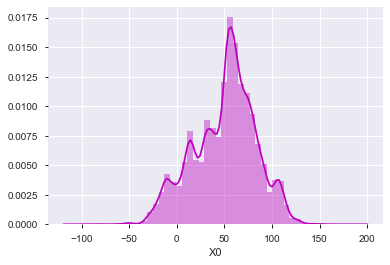

In [15]:
sns.distplot(gestures.X0, color = "m")
plt.show()

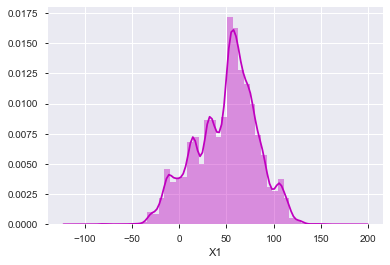

In [16]:
sns.distplot(gestures.X1, color = "m")
plt.show()

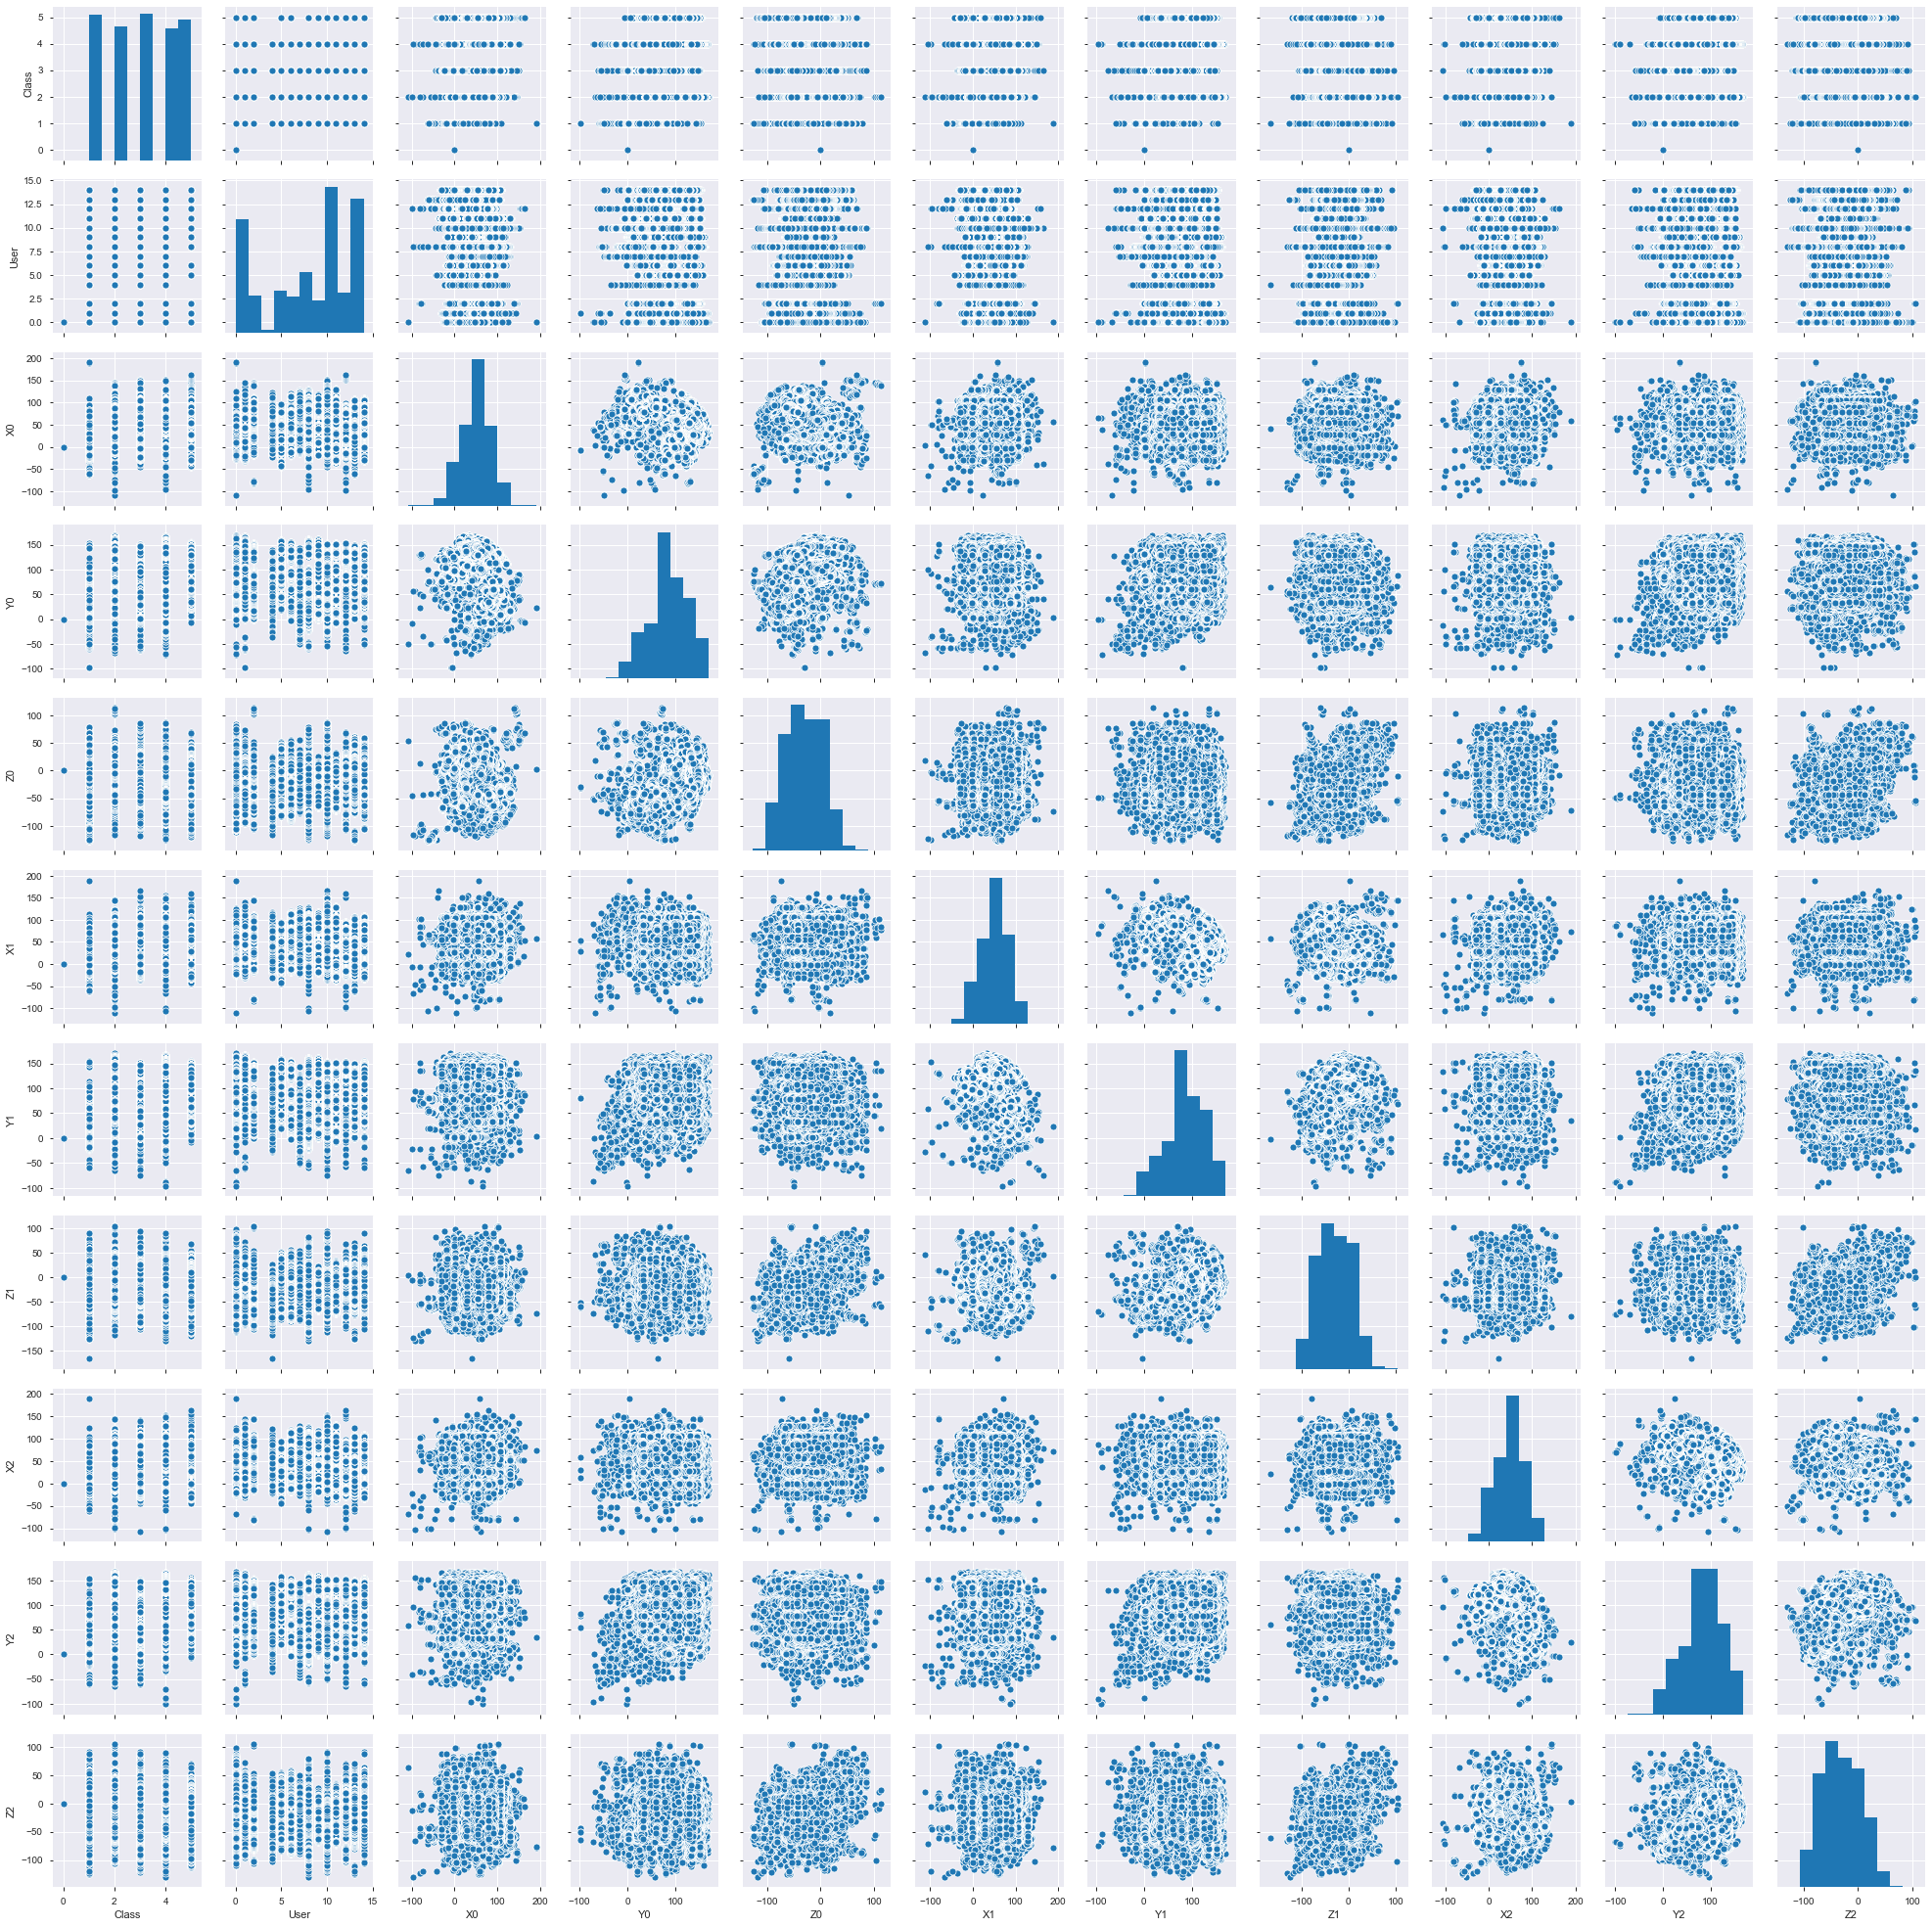

In [17]:
sns.pairplot(gestures)

In [18]:
gestures.X5.value_counts()

?                    13023
55.0656244261122         1
54.351409943422          1
67.0045920457047         1
67.1079381814251         1
64.7379169647432         1
51.8551118505548         1
74.2137555692925         1
91.1242136025091         1
-16.7349426957464        1
9.6077821269491          1
18.1070948879526         1
82.7739051864844         1
47.071185077404          1
31.5238509725608         1
45.3164977777844         1
3.94117391704386         1
57.1520644395107         1
54.0851147085413         1
74.7940198690729         1
38.5197764664703         1
0.494256122566748        1
45.3909357134305         1
76.3077293245182         1
13.9587024767698         1
58.8474175134057         1
51.4833521505347         1
59.8444606651034         1
-16.9434560370221        1
-12.0758310331117        1
                     ...  
-20.191516977039         1
14.2237556546863         1
97.3102328494053         1
-13.0480069370089        1
105.962245712407         1
59.8601520732922         1
6

In [19]:
gestures.X0=gestures.X0.astype(int)
gestures.Y0=gestures.Y0.astype(int)
gestures.Z0=gestures.Z0.astype(int)
gestures.X1=gestures.X1.astype(int)
gestures.Y1=gestures.Y1.astype(int)
gestures.Z1=gestures.Z1.astype(int)
gestures.X2=gestures.X2.astype(int)
gestures.Y2=gestures.Y2.astype(int)
gestures.Z2=gestures.Z2.astype(int)

# replacing ? into 0 and then converting it into int then imputing the mean value in place of 0

In [20]:
gestures.X3.replace(to_replace=['?'],value=[0],inplace=True)

In [21]:
gestures.X3.value_counts()

0                    690
76.2877077845798       2
42.0229288803774       2
75.7791822770612       2
112.19225187655        1
40.6623930202557       1
58.8790131489038       1
48.8668238450063       1
23.256291515397        1
-19.3703634345177      1
64.1748789787649       1
-1.34075142120806      1
-11.4215303809253      1
56.9287764203835       1
29.6694842386375       1
69.6948486548517       1
55.1743521101052       1
70.4351405488532       1
103.989507803734       1
56.8393489877124       1
34.9994067931708       1
87.1961951251239       1
55.7638609851529       1
62.9370124551258       1
60.360723074689        1
54.546286247724        1
-5.50804608013611      1
102.589342046468       1
99.1927897615068       1
80.5742085116822       1
                    ... 
63.0148626356375       1
11.8790233667919       1
36.2153032518696       1
52.4437618771322       1
53.7924555422526       1
14.827675710189        1
20.0767420874849       1
88.8979776516525       1
45.5328845088021       1


In [22]:
gestures.Y3.replace(to_replace=['?'],value=[0],inplace=True)

In [23]:
gestures.Z3.replace(to_replace=['?'],value=[0],inplace=True)

In [24]:
gestures.X4.replace(to_replace=['?'],value=[0],inplace=True)

In [25]:
gestures.Z4.replace(to_replace=['?'],value=[0],inplace=True)

In [26]:
gestures.Y4.replace(to_replace=['?'],value=[0],inplace=True)

In [27]:
gestures.X5.replace(to_replace=['?'],value=[0],inplace=True)

In [28]:
gestures.Y5.replace(to_replace=['?'],value=[0],inplace=True)

In [29]:
gestures.Z5.replace(to_replace=['?'],value=[0],inplace=True)

In [30]:
gestures.X6.replace(to_replace=['?'],value=[0],inplace=True)

In [31]:
gestures.Y6.replace(to_replace=['?'],value=[0],inplace=True)

In [32]:
gestures.Z6.replace(to_replace=['?'],value=[0],inplace=True)

In [33]:
gestures.X7.replace(to_replace=['?'],value=[0],inplace=True)

In [34]:
gestures.Y7.replace(to_replace=['?'],value=[0],inplace=True)

In [35]:
gestures.Z7.replace(to_replace=['?'],value=[0],inplace=True)

In [36]:
gestures.X8.replace(to_replace=['?'],value=[0],inplace=True)

In [37]:
gestures.Y8.replace(to_replace=['?'],value=[0],inplace=True)

In [38]:
gestures.Z8.replace(to_replace=['?'],value=[0],inplace=True)

In [39]:
gestures.X9.replace(to_replace=['?'],value=[0],inplace=True)

In [40]:
gestures.Y9.replace(to_replace=['?'],value=[0],inplace=True)

In [41]:
gestures.Z9.replace(to_replace=['?'],value=[0],inplace=True)

In [42]:
gestures.X10.replace(to_replace=['?'],value=[0],inplace=True)

In [43]:
gestures.Y10.replace(to_replace=['?'],value=[0],inplace=True)

In [44]:
gestures.Z10.replace(to_replace=['?'],value=[0],inplace=True)

In [45]:
gestures.X11.replace(to_replace=['?'],value=[0],inplace=True)

In [46]:
gestures.Y11.replace(to_replace=['?'],value=[0],inplace=True)

In [47]:
gestures.Z11.replace(to_replace=['?'],value=[0],inplace=True)

In [48]:

gestures.X3=gestures.X3.astype(float)
gestures.Y3=gestures.Y3.astype(float)
gestures.Z3=gestures.Z3.astype(float)
gestures.X4=gestures.X4.astype(float)
gestures.Y4=gestures.Y4.astype(float)
gestures.Z4=gestures.Z4.astype(float)
gestures.X5=gestures.X5.astype(float)
gestures.Y5=gestures.Y5.astype(float)
gestures.Z5=gestures.Z5.astype(float)
gestures.X6=gestures.X6.astype(float)
gestures.Y6=gestures.Y6.astype(float)
gestures.Z6=gestures.Z6.astype(float)
gestures.X7=gestures.X7.astype(float)
gestures.Y7=gestures.Y7.astype(float)
gestures.Z7=gestures.Z7.astype(float)
gestures.X8=gestures.X8.astype(float)
gestures.Y8=gestures.Y8.astype(float)
gestures.Z8=gestures.Z8.astype(float)
gestures.X9=gestures.X9.astype(float)
gestures.Y9=gestures.Y9.astype(float)
gestures.Z9=gestures.Z9.astype(float)
gestures.X10=gestures.X10.astype(float)
gestures.Y10=gestures.Y10.astype(float)
gestures.Z10=gestures.Z10.astype(float)
gestures.X11=gestures.X11.astype(float)
gestures.Y11=gestures.Y11.astype(float)
gestures.Z11=gestures.Z11.astype(float)


In [49]:
dataframe=gestures.fillna(gestures.mean())


In [50]:
dataframe.head()

Class  User  X0  Y0  Z0  X1  Y1  Z1  X2  Y2  ...   Z8   X9   Y9   Z9  X10  \
0      0     0   0   0   0   0   0   0   0   0  ...  0.0  0.0  0.0  0.0  0.0   
1      1     0  54  71 -64  76  42 -72  36  81  ...  0.0  0.0  0.0  0.0  0.0   
2      1     0  56  72 -61  39  82 -49  79  43  ...  0.0  0.0  0.0  0.0  0.0   
3      1     0  55  72 -62  37  82 -50  78  43  ...  0.0  0.0  0.0  0.0  0.0   
4      1     0  55  71 -63  36  81 -52  86  68  ...  0.0  0.0  0.0  0.0  0.0   

   Y10  Z10  X11  Y11  Z11  
0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  

[5 rows x 38 columns]

In [51]:
dataframe.X3.replace(to_replace=[0],value=dataframe.X3.mean(),inplace=True)

In [52]:
dataframe.Y3.replace(to_replace=[0],value=dataframe.Y3.mean(),inplace=True)

In [53]:
dataframe.Z3.replace(to_replace=[0],value=dataframe.Z3.mean(),inplace=True)

In [54]:
dataframe.X4.replace(to_replace=[0],value=dataframe.X4.mean(),inplace=True)

In [55]:
dataframe.Z4.replace(to_replace=[0],value=dataframe.Z4.mean(),inplace=True)

In [56]:
dataframe.Y4.replace(to_replace=[0],value=dataframe.Y4.mean(),inplace=True)

In [57]:
dataframe.X5.replace(to_replace=[0],value=dataframe.X5.mean(),inplace=True)

In [58]:
dataframe.X6.replace(to_replace=[0],value=dataframe.X6.mean(),inplace=True)

In [59]:
dataframe.X7.replace(to_replace=[0],value=dataframe.X7.mean(),inplace=True)

In [60]:
dataframe.X8.replace(to_replace=[0],value=dataframe.X8.mean(),inplace=True)

In [61]:
dataframe.X9.replace(to_replace=[0],value=dataframe.X9.mean(),inplace=True)

In [62]:
dataframe.X10.replace(to_replace=[0],value=dataframe.X10.mean(),inplace=True)

In [63]:
dataframe.X11.replace(to_replace=[0],value=dataframe.X11.mean(),inplace=True)

In [64]:
dataframe.Y5.replace(to_replace=[0],value=dataframe.Y5.mean(),inplace=True)

In [65]:
dataframe.Y6.replace(to_replace=[0],value=dataframe.Y6.mean(),inplace=True)

In [66]:
dataframe.Y7.replace(to_replace=[0],value=dataframe.Y7.mean(),inplace=True)

In [67]:
dataframe.Y8.replace(to_replace=[0],value=dataframe.Y8.mean(),inplace=True)

In [68]:
dataframe.Y9.replace(to_replace=[0],value=dataframe.Y9.mean(),inplace=True)

In [69]:
dataframe.Y10.replace(to_replace=[0],value=dataframe.Y10.mean(),inplace=True)

In [70]:
dataframe.Y11.replace(to_replace=[0],value=dataframe.Y11.mean(),inplace=True)

In [71]:
dataframe.Z5.replace(to_replace=[0],value=dataframe.Z5.mean(),inplace=True)

In [72]:
dataframe.Z6.replace(to_replace=[0],value=dataframe.Z6.mean(),inplace=True)

In [73]:
dataframe.Z7.replace(to_replace=[0],value=dataframe.Z7.mean(),inplace=True)

In [74]:
dataframe.Z8.replace(to_replace=[0],value=dataframe.Z8.mean(),inplace=True)

In [75]:
dataframe.Z9.replace(to_replace=[0],value=dataframe.Z9.mean(),inplace=True)

In [76]:
dataframe.Z10.replace(to_replace=[0],value=dataframe.Z10.mean(),inplace=True)

In [77]:
dataframe.Z11.replace(to_replace=[0],value=dataframe.Z11.mean(),inplace=True)

In [78]:
dataframe.drop("User",axis=1,inplace=True)

In [79]:
dataframe.head(5)

Class  X0  Y0  Z0  X1  Y1  Z1  X2  Y2  Z2  ...        Z8         X9  \
0      0   0   0   0   0   0   0   0   0   0  ... -9.535221  16.802004   
1      1  54  71 -64  76  42 -72  36  81 -52  ... -9.535221  16.802004   
2      1  56  72 -61  39  82 -49  79  43 -69  ... -9.535221  16.802004   
3      1  55  72 -62  37  82 -50  78  43 -70  ... -9.535221  16.802004   
4      1  55  71 -63  36  81 -52  86  68 -72  ... -9.535221  16.802004   

          Y9        Z9        X10        Y10       Z10       X11       Y11  \
0  24.718821 -8.524846  10.154783  13.978967 -5.617378 -0.011788  0.010306   
1  24.718821 -8.524846  10.154783  13.978967 -5.617378 -0.011788  0.010306   
2  24.718821 -8.524846  10.154783  13.978967 -5.617378 -0.011788  0.010306   
3  24.718821 -8.524846  10.154783  13.978967 -5.617378 -0.011788  0.010306   
4  24.718821 -8.524846  10.154783  13.978967 -5.617378 -0.011788  0.010306   

        Z11  
0  0.000674  
1  0.000674  
2  0.000674  
3  0.000674  
4  0.000674  

[5 rows x 37 columns]

In [80]:
dataframe.shape

(78096, 37)

In [81]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
demo =dataframe
X=demo.drop('Class',axis=1)
y=demo['Class']
poly=PolynomialFeatures(degree=1)
trainaccuracy=[]
testaccuracy=[]
for i in range(100):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=i)
    lr=LinearRegression()
    polyXtrain = poly.fit_transform(Xtrain)
    polyXtest=poly.transform(Xtest)
    lr.fit(polyXtrain,ytrain)
    trainaccuracy.append(lr.score(polyXtrain,ytrain))
    testaccuracy.append(lr.score(polyXtest,ytest))
print("Training Accuracy")
print(np.mean(trainaccuracy))
print("Testing Accuracy")
print(np.mean(testaccuracy))

Training Accuracy
0.3693610188964003
Testing Accuracy
0.3666656944257305


# here we converted the entire missing value to mean 
and made a polynomial model 